# **Indian Used Car Market Study**

-----------------------------
## **Context**
-----------------------------

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past few years and is now larger than the new car market. Cars4U is a budding tech start-up that aims to break ground in this market. In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer/except for dealership level discounts which come into play only in the last stage of the customer journey), the used car market is a very different beast, with large uncertainties in both pricing and supply. Several factors, including mileage, brand, model, year, etc. can influence the actual worth of a car. From the perspective of a seller, it is not an easy task to set the correct price of a used car. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.


-----------------------------
## **Objective** 
-----------------------------

To build a predictive model for the price of used vehicles in the Indian market.

-----------------------------
## **Dataset** 
-----------------------------

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

The data has missing values and will be treated accordingly.

-----------------------------
## **Importing the libraries and overview of the dataset**
-----------------------------

### **Loading libraries**

In [91]:
# Import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

### **Load the data**

In [92]:
data = pd.read_csv("used_cars.csv")

### **Observe a few rows**

In [93]:
# View first 5 rows
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [94]:
# View last 5 rows
data.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN


**Observations and Insights:**

- Price and New Price don't all have entries. We should check how many null values there are and consider how to tailor the data accordingly.

- Check that categorical data isn't double labeled.

### **Check the data types and and missing values of each column** 

In [95]:
# Check the datatypes of each column.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [96]:
# Check total number of missing values of each column.
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64

In [97]:
# Check total number of missing values of each column.
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64

**Observations and Insights:**

- Mileage, Engine, Power, and Seats are missing entries. Imputing will eb considered.

- Because it is missing so many data, the New_price variable doesn't seem to have much benefit so will be excluded from the model.

- Since Price is the target variable, the data without a price entry will be removed from the dataset.

In [98]:
# Check number of unique values of the variable S.No.
data['S.No.'].nunique()

7253

We can observe that `S.No.` has no null values. Also the number of unique values are equal to the number of observations. So, `S.No.` looks like an index for the data entry and such a column would not be useful in providing any predictive power for our analysis. Hence, it can be dropped.

In [99]:
# Remove S.No. column from data.
data.drop(["S.No."], inplace = True, axis = 1)

-----------------------------
## **Exploratory Data Analysis**
-----------------------------

### **Explore the summary statistics of numerical variables**

In [100]:
# Explore basic summary statistics of numeric variables.
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_price,Price
count,7253.000000,7.253000e+03,7251.000000,7207.000000,7078.000000,7200.000000,1006.000000,6019.000000
mean,2013.365366,5.869906e+04,18.141580,1616.573470,112.765214,5.280417,22.779692,9.479468
std,3.254421,8.442772e+04,4.562197,595.285137,53.493553,0.809277,27.759344,11.187917
min,1996.000000,1.710000e+02,0.000000,72.000000,34.200000,2.000000,3.910000,0.440000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,75.000000,5.000000,7.885000,3.500000
50%,2014.000000,5.341600e+04,18.160000,1493.000000,94.000000,5.000000,11.570000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1968.000000,138.100000,5.000000,26.042500,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,616.000000,10.000000,375.000000,160.000000


**Observations and Insights:**

- There are 7253 distinct cars measured.

- At least 50% of the vehicles have 5 seats.

- The New_price variable is highly incomplete, so we may not get much information out of it.

- The mean of Price is approx. INR 947,900, whereas the median of of Price is INR 564,000. This indicates that the Price distribution is heavily skewed towards the left side.

- The Price variable is missing a sizable number of inputs. We will either need to impute or delete some data during analysis.

### **Explore the summary statistics of all categorical variables and the number of unique observations in each category**

In [101]:
# Explore basic summary statistics of categorical variables.
data.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251.0,NaN,NaN,NaN,18.14158,4.562197,0.0,15.17,18.16,21.1,33.54
Engine,7207.0,NaN,NaN,NaN,1616.57347,595.285137,72.0,1198.0,1493.0,1968.0,5998.0
Power,7078.0,NaN,NaN,NaN,112.765214,53.493553,34.2,75.0,94.0,138.1,616.0


### **Number of unique observations in each category**

In [102]:
cat_cols = data.select_dtypes(include = ['object']).columns

for column in cat_cols:
    
    print("For column:", column)
    
    print(data[column].value_counts())
    
    print('-'*50)

For column: Name
Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: Name, Length: 2041, dtype: int64
--------------------------------------------------
For column: Location
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64
--------------------------------------------------
For column: Fuel_Type
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Typ

**Observations and Insights:**

- kilometers_driven has a suspiciously high max.

- Some entries have a mileage of 0, which is implausible.

**Let's explore the points mentioned above**

### **Check Kilometers_Driven extreme values**

In [103]:
# Sort the dataset in 'descending' order using the feature 'Kilometers_Driven'
data.sort_values("Kilometers_Driven", ascending = False).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,NaN,65.00
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.50
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.90
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.70
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.00
3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,NaN,5.00
4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,NaN,4.45
6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,23.40,1248.0,74.00,5.0,NaN,NaN
3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.00,1405.0,70.00,5.0,NaN,1.00
1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.80,2494.0,102.00,8.0,NaN,4.00


**Observations and Insights:**

- In the first row, a car manufactured as recently as 2017 having been driven 6500000 km is almost impossible. It can be considered as data entry error and so we can remove this value/entry from data.

In [104]:
# Removing the 'row' at index 2328 from the data.
data.drop(2328, inplace=True)

### **Check Mileage extreme values**

In [105]:
# Sort the dataset in 'ascending' order using the feature 'Mileage'
data.sort_values("Mileage").head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2597,Hyundai Santro Xing XP,Pune,2007,70000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.12
2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,NaN,2.30
5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,1.85
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,NaN,5.45
6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,NaN
443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,3.35
5119,Hyundai Santro Xing XP,Kolkata,2008,45500,Petrol,Manual,Second,0.0,1086.0,NaN,5.0,NaN,1.17
5022,Land Rover Freelander 2 TD4 SE,Hyderabad,2013,46000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,NaN,26.00
5016,Land Rover Freelander 2 TD4 HSE,Delhi,2013,72000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,15.50
2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,3.15


**Observations and Insights:**
    
- Mileage of cars can not be 0, so 0's will be treated as missing values.

-----------------------------
## **Univariate Analysis**
-----------------------------

Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables.

## **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyse the numerical columns.

In [106]:
# Let us write a function that will help us create a boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize = (15, 10), bins = None):
    
    """ Boxplot and histogram combined
    
    feature: 1-d feature array
    
    figsize: size of fig (default (9, 8))
    
    bins: number of bins (default None / auto)
    
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid = 2
                                           sharex = True, # X-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # Creating the 2 subplots
    
    sns.boxplot(feature, ax = ax_box2, showmeans = True, color = 'violet') # Boxplot will be created and a symbol will indicate the mean value of the column
    
    sns.distplot(feature, kde = F, ax = ax_hist2, bins = bins, palette = "winter") if bins else sns.distplot(feature, kde = False, ax = ax_hist2) # For histogram
    
    ax_hist2.axvline(np.mean(feature), color = 'green', linestyle = '--') # Add mean to the histogram
    
    ax_hist2.axvline(np.median(feature), color = 'black', linestyle = '-') # Add median to the histogram

**Plot histogram and box-plot for the feature 'Kilometers_Driven' to understand the distribution and outliers, if any.**

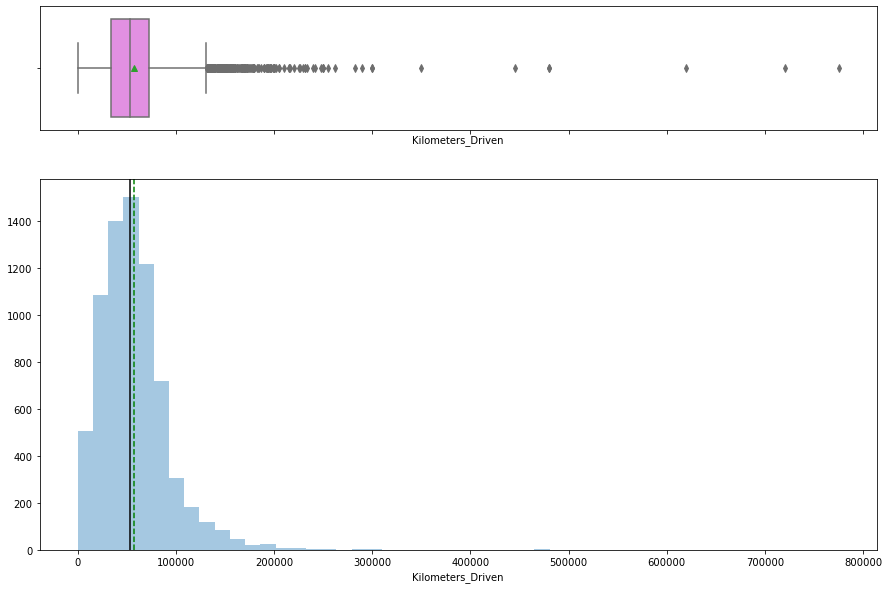

In [107]:
# Plot histogram and box-plot for 'Kilometers_Driven'
histogram_boxplot(data['Kilometers_Driven'])

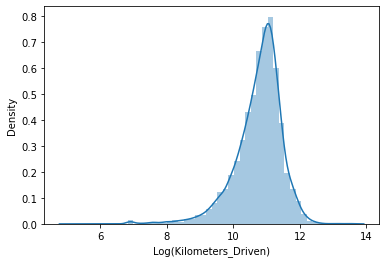

In [108]:
# Log transformation of the feature 'Kilometers_Driven'
sns.distplot(np.log(data["Kilometers_Driven"]), axlabel = "Log(Kilometers_Driven)");

**Observations and Insights:**

- The log of Kilometers_Driven is slightly left-skewed, an improvement from the original plot.

In [109]:
# We can add a transformed kilometers_driven feature in data
data["kilometers_driven_log"] = np.log(data["Kilometers_Driven"])

**Note:** Like Kilometers_Driven, the distribution of Price is also highly skewed, we can use log transformation on this column to see if that helps normalize the distribution. And add the transformed variable into the dataset.

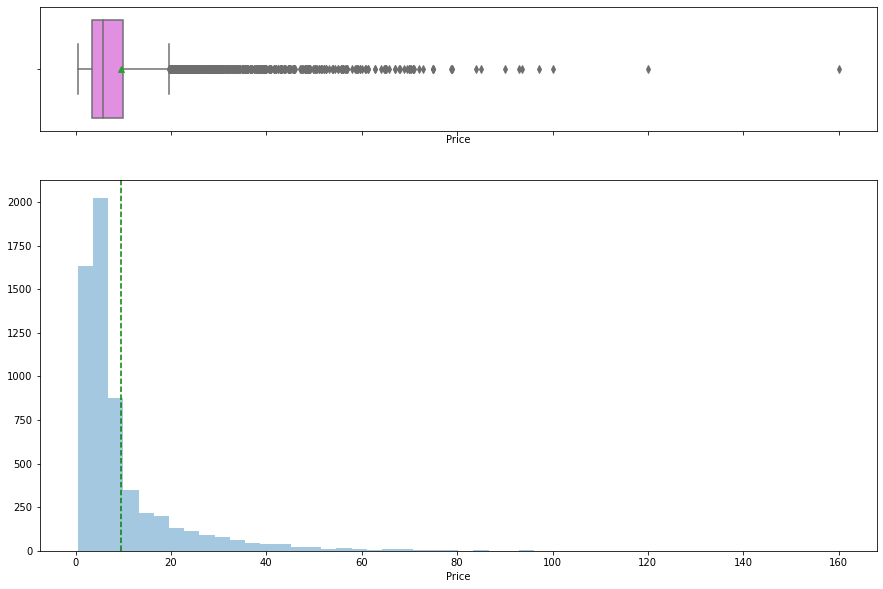

In [110]:
# Plot histogram and box-plot for 'Price'
histogram_boxplot(data['Price'])

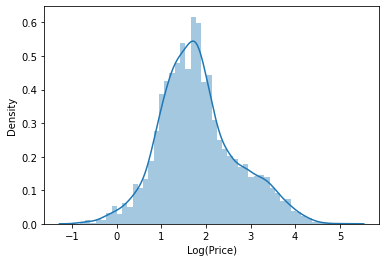

In [111]:
# Log transformation of the feature 'Price'
sns.distplot(np.log(data["Price"]), axlabel = "Log(Price)");

In [112]:
# We can Add a transformed Price feature in data
data["price_log"] = np.log(data["Price"])

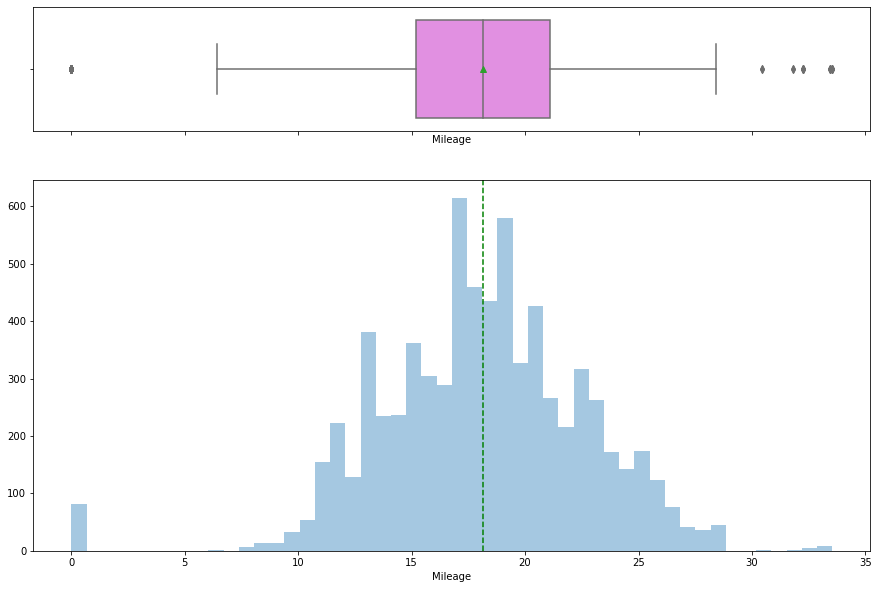

In [113]:
# Plot histogram and box-plot for 'Mileage'
histogram_boxplot(data['Mileage'])

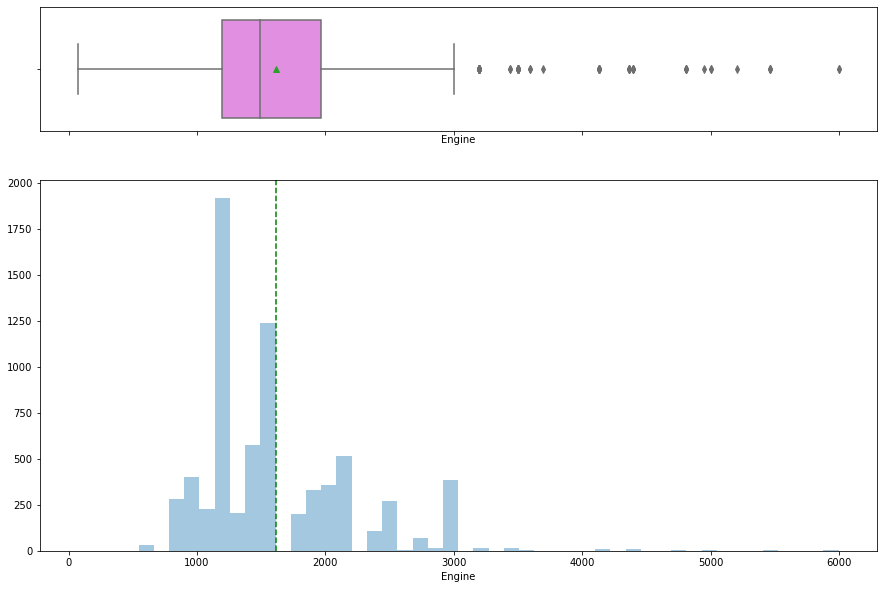

In [114]:
# Plot histogram and box-plot for 'Engine'
histogram_boxplot(data['Engine'])

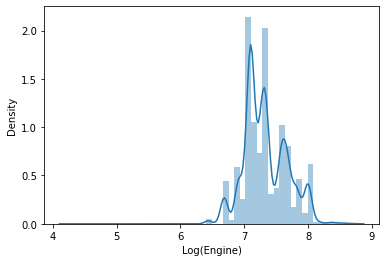

In [115]:
# Log transformation of the feature 'Engine'
sns.distplot(np.log(data["Engine"]), axlabel = "Log(Engine)");

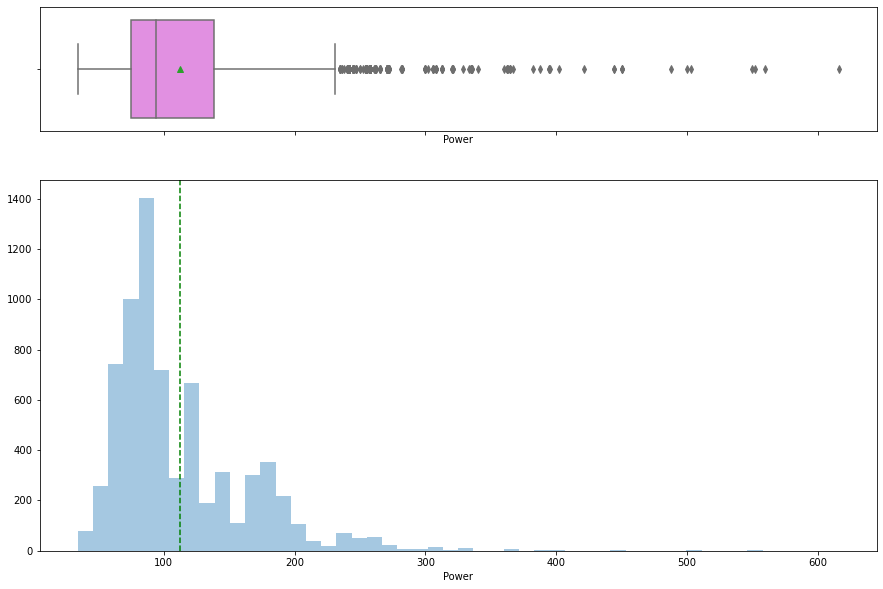

In [116]:
# Plot histogram and box-plot for 'Power'
histogram_boxplot(data['Power'])

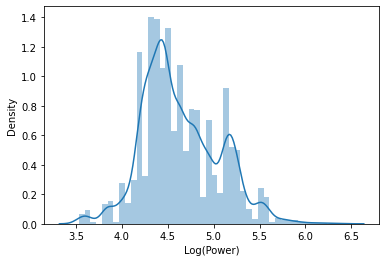

In [117]:
# Log transformation of the feature 'Power'
sns.distplot(np.log(data["Power"]), axlabel = "Log(Power)");

**Observations and Insights for all the plots:**

- Price_log seems to be an improvement from the original.

- The other variables don't seem to benefit from a log normalization.

## **2. Univariate analysis - Categorical Data**

In [118]:
# Let us write a function that will help us create barplots that indicate the percentage for each category.
# This function takes the categorical column as the input and returns the barplots for the variable.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z]) # Length of the column
    
    plt.figure(figsize = (15, 5))
    
    ax = sns.countplot(data[z], palette = 'Paired', order = data[z].value_counts().index)
    
    for p in ax.patches:
        
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class of the category
        
        x = p.get_x() + p.get_width() / 2 - 0.05 # Width of the plot
        
        y = p.get_y() + p.get_height()           # Hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # Annotate the percantage 
    
    plt.show() # Show the plot

**Plot barplot for the variable location. It will be helpful to know the number of percentage of cars from each city.**

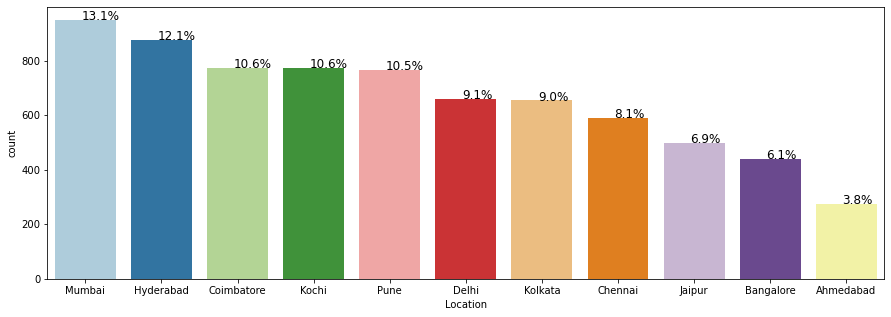

In [119]:
# Bar Plot for 'Location'
perc_on_bar('Location')

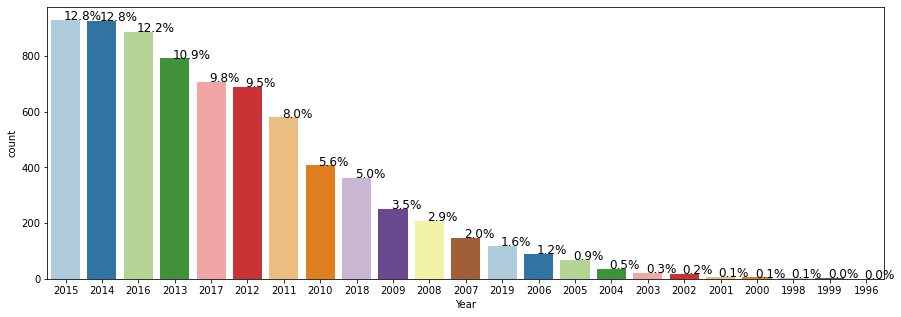

In [120]:
# Bar Plot for 'Year'
perc_on_bar('Year')

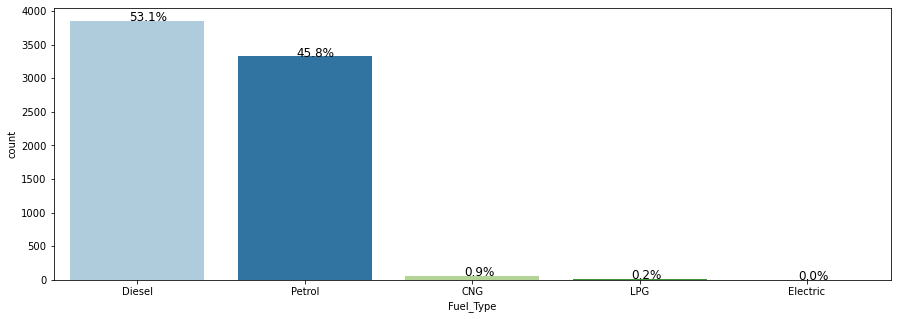

In [121]:
# Bar Plot for 'Fuel_Type'
perc_on_bar('Fuel_Type')

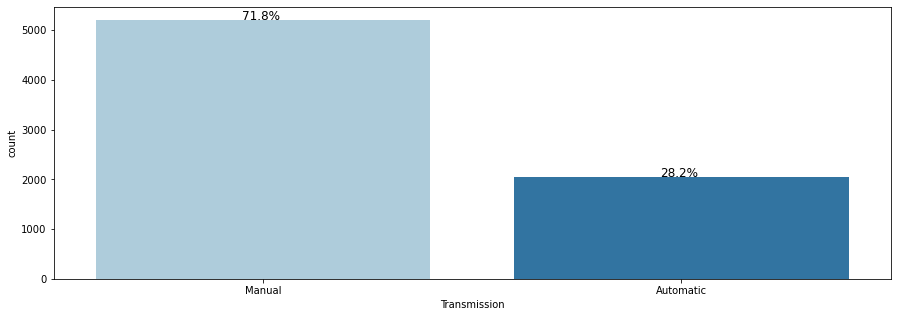

In [122]:
# Bar Plot for 'Transmission'
perc_on_bar('Transmission')

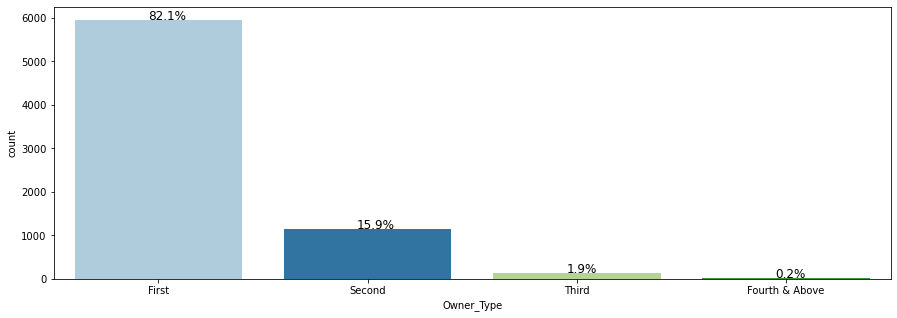

In [123]:
# Bar Plot for 'Owner_Type'
perc_on_bar('Owner_Type')

**Observations and Insights from all plots:**

- Mumbai has the highest number of used car data.

- A vast majority(82.1%) of vehicles being sold have only had one owner.

- 96.6% of vehicles sold are newer than 2006.

-----------------------------
## **Bivariate Analysis**
-----------------------------

### **1. Scatter plot**
A scatter plot allows us to see relationships between two variables. 

**Note: Use log transformed values 'kilometers_driven_log' and 'price_log'**

<AxesSubplot:xlabel='price_log'>

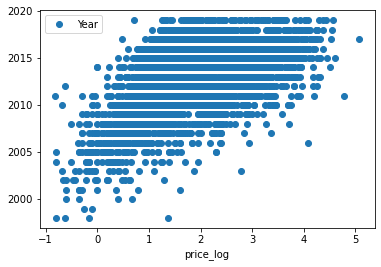

In [124]:
# Let us plot pair plot for the variables 'year' and 'price_log'
data.plot(x = 'price_log', y = 'Year', style = 'o')

<AxesSubplot:xlabel='price_log'>

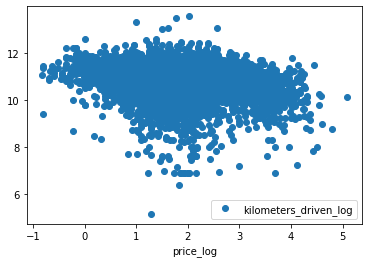

In [125]:
# Let us plot pair plot for the variables 'kilometers_driven_log' and 'price_log'
data.plot(x = 'price_log', y = 'kilometers_driven_log', style = 'o')

<AxesSubplot:xlabel='price_log'>

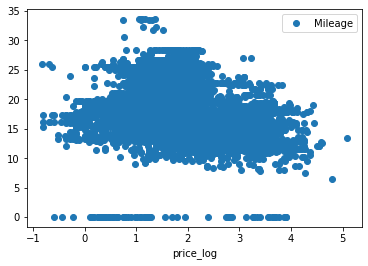

In [126]:
# Let us plot pair plot for the variables 'Mileage' and 'price_log'
data.plot(x = 'price_log', y = 'Mileage', style = 'o')

<AxesSubplot:xlabel='price_log'>

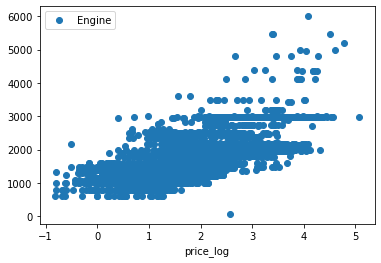

In [127]:
# Let us plot pair plot for the variables 'Engine' and 'price_log'
data.plot(x = 'price_log', y = 'Engine', style = 'o')

<AxesSubplot:xlabel='price_log'>

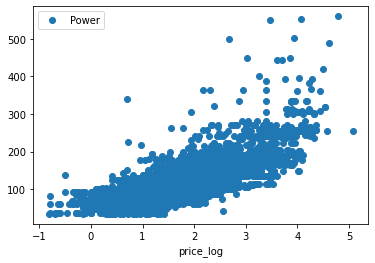

In [128]:
# Let us plot pair plot for the variables 'Power' and 'price_log'
data.plot(x = 'price_log', y = 'Power', style = 'o')

<AxesSubplot:xlabel='price_log'>

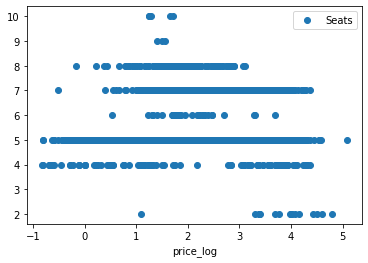

In [129]:
# Let us plot pair plot for the variables 'Seats' and 'price_log'
data.plot(x = 'price_log', y = 'Seats', style = 'o')

**Observations and Insights from all plots:**

- There seems to be a positive correlation between price_log and model year, Power, and Engine.

- There seems to be no correlation between price_log and kilometers_driven_log, Mileage, and Seats.

### **2. Heat map**
Heat map shows a 2D correlation matrix between two numerical features.

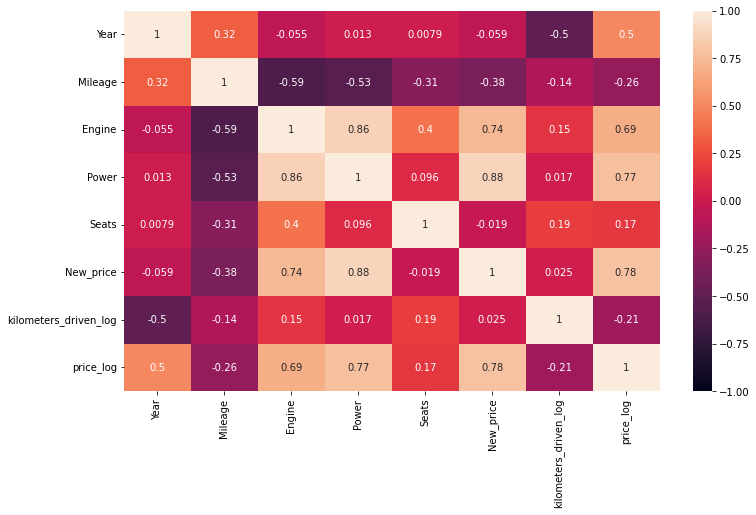

In [130]:
# We can include the log transformation values and drop the original skewed data columns
plt.figure(figsize = (12, 7))

sns.heatmap(data.drop(["Kilometers_Driven", "Price"],axis = 1).corr(), annot = True, vmin = -1, vmax = 1)

plt.show()

**Observations and Insights:**

- Year correlates moderately with price_log and moderately negatively correlates with kilometers_driven_log.

- Mileage correlates moderately negatively correlates with Engine and Power.

- Engine highly correlates with Power and New_price, correlates moderately with price_log and seats, and moderately negatively correlates with Mileage.

- Power highly correlates with Engine, New_price, and price_log, and moderately negatively correlates with Mileage.

- Seats correlates moderately with Engine.

- New_price highly correlates with Engine, Power, and price_log.

- kilometers_driven_log moderately negatively correlates with Year.

- price_log highly correlates with Power and New_price, and correlates moderately with Year and Engine.

### **3. Box plot**

In [131]:
# Let us write a function that will help us create boxplot w.r.t Price for any input categorical variable.
# This function takes the categorical column as the input and returns the boxplots for the variable.
def boxplot(z):
    
    plt.figure(figsize = (12, 5)) # Setting size of boxplot
    
    sns.boxplot(x = z, y = data['Price']) # Defining x and y
    
    plt.show()
    
    plt.figure(figsize = (12, 5))
    
    plt.title('Without Outliers')
    
    sns.boxplot(x = z, y = data['Price'], showfliers = False) # Turning off the outliers
    
    plt.show()

#### Plot bivariate analysis of target variable with a categorical variable 'Location'

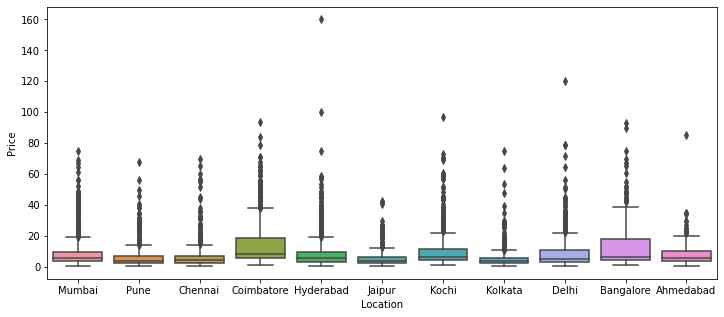

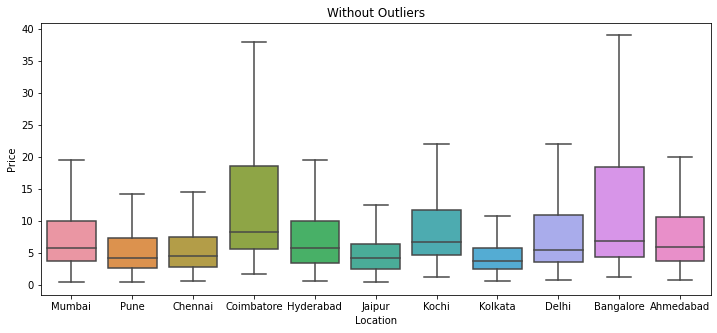

In [132]:
# Box Plot: Price vs Location
boxplot(data['Location'])

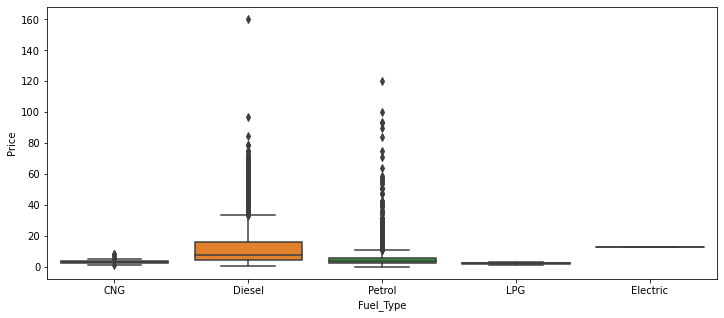

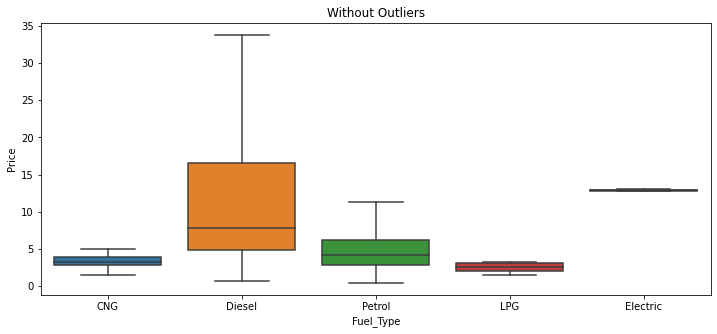

In [133]:
# Box Plot: Price vs Fuel_Type
boxplot(data['Fuel_Type'])

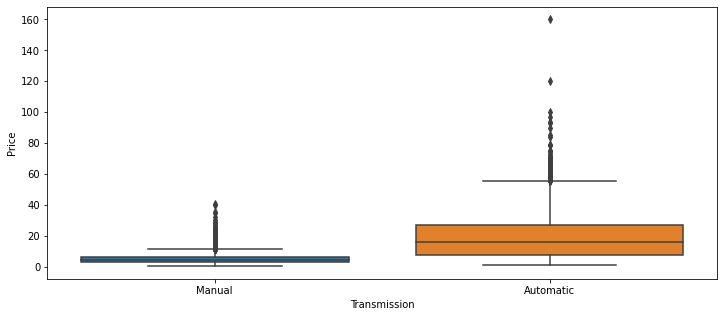

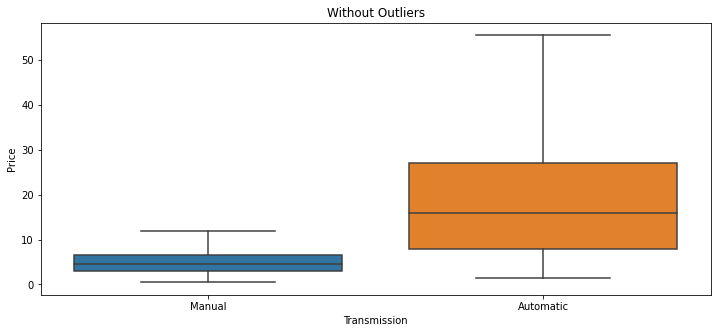

In [134]:
# Box Plot: Price vs Transmission
boxplot(data['Transmission'])

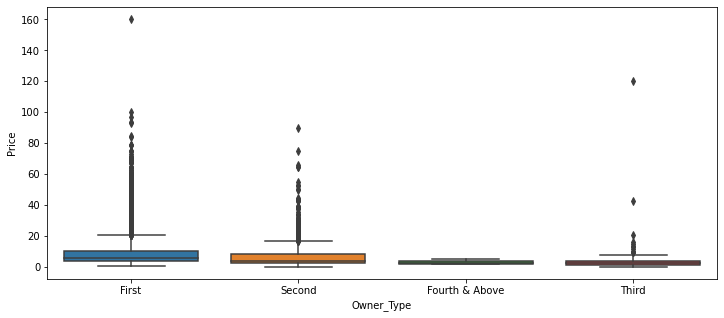

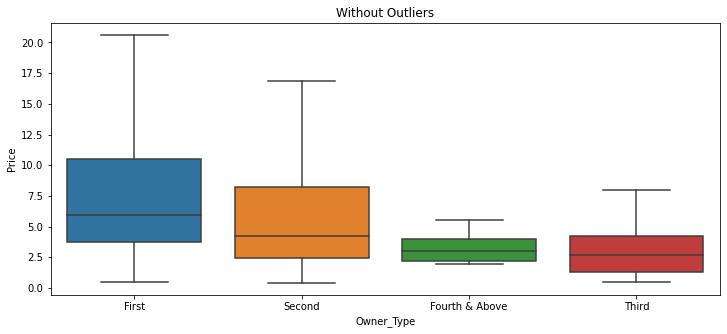

In [135]:
# Box Plot: Price vs Owner_Type
boxplot(data['Owner_Type'])

**Observations and Insights for all plots:**

- Coimbatore and Bangalore have much higher variance in Price than the other locations.

-----------------------------
## **Feature Engineering**
-----------------------------

Split the 'Name' column into a Brand and Model.

In [136]:
data["Brand"] = data.Name.str.split().str.get(0)
print("For column: Brand")
print(data["Brand"].value_counts())

data["Model"] = data.Name.str.split().str.get(1)
print("For column: Model")
print(data["Model"].value_counts())

For column: Brand
Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               311
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land               67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini               31
Volvo              28
Porsche            19
Jeep               19
Datsun             17
ISUZU               3
Force               3
Isuzu               2
Bentley             2
Smart               1
Ambassador          1
Lamborghini         1
Hindustan           1
OpelCorsa           1
Name: Brand, dtype: int64
For column: Model
Swift        418
City         318
i20          303
Innova       203
Verna        200
            ... 
CLS-Class      1
Redi           1
E              1
Evalia         1
1.4Gsi         1
Name: Model, Length: 219,

**Observations and Insights:**

- There are 33 brands.

### **Missing value treatment**

In [137]:
# Now check the missing values of each column.
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                      53
New_price                6246
Price                    1234
kilometers_driven_log       0
price_log                1234
Brand                       0
Model                       0
dtype: int64

**Observations and Insights:**

- Data with missing Price entries should be culled.
- The New_price column should be removed.
- Other missing values should be imputed.

In [138]:
# Delete rows with missing price
data = data[data['Price'].notnull()]

### **Missing values in Seats**

In [139]:
# Checking missing values in the column 'Seats'
data[data['Seats'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log,Brand,Model
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,NaN,NaN,NaN,NaN,2.95,11.002200,1.081805,Honda,City
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,NaN,NaN,NaN,NaN,2.11,10.645449,0.746688,Maruti,Swift
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.00,1498.0,99.0,NaN,NaN,3.60,11.162460,1.280934,Ford,Figo
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.10,NaN,NaN,NaN,NaN,1.75,11.490680,0.559616,Maruti,Swift
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,NaN,NaN,NaN,NaN,26.50,10.915107,3.277145,Land,Rover
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.80,NaN,NaN,NaN,NaN,3.20,10.915179,1.163151,Honda,City
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.10,NaN,NaN,NaN,NaN,5.80,10.825661,1.757858,Maruti,Swift
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.00,NaN,NaN,NaN,NaN,1.50,11.652687,0.405465,Honda,City
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.00,NaN,NaN,NaN,NaN,40.88,11.142992,3.710641,Land,Rover
1917,Honda City 1.5 EXI,Jaipur,2005,88000,Petrol,Manual,Second,13.00,1493.0,100.0,NaN,NaN,1.70,11.385092,0.530628,Honda,City


In [140]:
# Impute missing values in Seats by using the median
data["Seats"] = data.groupby(["Brand","Model"])["Seats"].transform(lambda x: x.fillna(x.median()))

In [141]:
# Now check total number of missing values of the seat column to verify if they are imputed or not.
data[data['Seats'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log,Brand,Model
2369,Maruti Estilo LXI,Chennai,2008,56000,Petrol,Manual,Second,19.5,1061.0,NaN,NaN,NaN,1.50,10.933107,0.405465,Maruti,Estilo
3882,Maruti Estilo LXI,Kolkata,2010,40000,Petrol,Manual,Second,19.5,1061.0,NaN,NaN,NaN,2.50,10.596635,0.916291,Maruti,Estilo
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.5,1061.0,NaN,NaN,NaN,1.75,10.839581,0.559616,Maruti,Estilo


In [142]:
# Impute missing Mileage by using researched data
data.loc[2369, "Seats"] = 5
data.loc[3882, "Seats"] = 5
data.loc[5893, "Seats"] = 5

In [143]:
# Now check total number of missing values of the seat column to verify if they are imputed or not.
data[data['Seats'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log,Brand,Model


### **Missing values for Mileage**

In [144]:
# Now check missing values of Mileage.
data[data['Mileage'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log,Brand,Model
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.58,13.00,10.819778,2.564949,Mahindra,E
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,NaN,12.75,10.691945,2.545531,Toyota,Prius


In [145]:
# Delete rows with missing mileage
data = data[data['Mileage'].notnull()]

In [146]:
# Now check total number of missing values of the seat column to verify if they are imputed or not.
data[data['Mileage'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log,Brand,Model


**Values of 0 for mileage should also be considered missing**

In [147]:
# Now check zero values of Mileage.
data[data['Mileage'] == 0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log,Brand,Model
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,NaN,17.50,11.350407,2.862201,Land,Rover
67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,Diesel,Automatic,First,0.0,1950.0,194.0,5.0,49.14,35.67,9.640108,3.574310,Mercedes-Benz,C-Class
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.30,11.380434,0.262364,Hyundai,Santro
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0,NaN,NaN,5.0,NaN,2.95,11.002200,1.081805,Honda,City
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0,1498.0,99.0,5.0,NaN,3.60,11.162460,1.280934,Ford,Figo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5647,Toyota Qualis Fleet A3,Mumbai,2001,227000,Diesel,Manual,Fourth & Above,0.0,2446.0,NaN,8.0,NaN,2.20,12.332705,0.788457,Toyota,Qualis
5875,Mercedes-Benz C-Class Progressive C 220d,Ahmedabad,2019,4000,Diesel,Automatic,First,0.0,1950.0,194.0,5.0,49.14,35.00,8.294050,3.555348,Mercedes-Benz,C-Class
5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,0.0,2112.0,NaN,6.0,NaN,1.70,11.225243,0.530628,Mahindra,Jeep
5972,Hyundai Santro Xing GL,Mumbai,2008,65000,Petrol,Manual,Second,0.0,1086.0,62.0,5.0,NaN,1.39,11.082143,0.329304,Hyundai,Santro


In [148]:
# Impute missing values in Mileage by using the median
data["Mileage"] = data.groupby(["Brand","Model"])["Mileage"].transform(lambda x: x.fillna(x.median()))

In [149]:
# Now check zero values of Mileage.
data[data['Mileage'] == 0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log,Brand,Model
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,NaN,17.50,11.350407,2.862201,Land,Rover
67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,Diesel,Automatic,First,0.0,1950.0,194.0,5.0,49.14,35.67,9.640108,3.574310,Mercedes-Benz,C-Class
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.30,11.380434,0.262364,Hyundai,Santro
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0,NaN,NaN,5.0,NaN,2.95,11.002200,1.081805,Honda,City
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0,1498.0,99.0,5.0,NaN,3.60,11.162460,1.280934,Ford,Figo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5647,Toyota Qualis Fleet A3,Mumbai,2001,227000,Diesel,Manual,Fourth & Above,0.0,2446.0,NaN,8.0,NaN,2.20,12.332705,0.788457,Toyota,Qualis
5875,Mercedes-Benz C-Class Progressive C 220d,Ahmedabad,2019,4000,Diesel,Automatic,First,0.0,1950.0,194.0,5.0,49.14,35.00,8.294050,3.555348,Mercedes-Benz,C-Class
5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,0.0,2112.0,NaN,6.0,NaN,1.70,11.225243,0.530628,Mahindra,Jeep
5972,Hyundai Santro Xing GL,Mumbai,2008,65000,Petrol,Manual,Second,0.0,1086.0,62.0,5.0,NaN,1.39,11.082143,0.329304,Hyundai,Santro


In [150]:
# Delete rows with 0 mileage
data = data[data['Mileage'] != 0]

In [151]:
# Now check zero values of Mileage.
data[data['Mileage'] == 0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log,Brand,Model


### **Missing values for Engine**

In [152]:
# Now check missing values of Engine.
data[data['Engine'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log,Brand,Model
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,NaN,NaN,5.0,NaN,2.11,10.645449,0.746688,Maruti,Swift
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.10,NaN,NaN,5.0,NaN,1.75,11.490680,0.559616,Maruti,Swift
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.80,NaN,NaN,5.0,NaN,3.20,10.915179,1.163151,Honda,City
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.10,NaN,NaN,5.0,NaN,5.80,10.825661,1.757858,Maruti,Swift
2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.10,NaN,NaN,5.0,NaN,3.15,10.096378,1.147402,Maruti,Swift
2264,Toyota Etios Liva V,Pune,2012,24500,Petrol,Manual,Second,18.30,NaN,NaN,5.0,NaN,2.95,10.106428,1.081805,Toyota,Etios
2325,Maruti Swift 1.3 VXI ABS,Pune,2015,67000,Petrol,Manual,First,16.10,NaN,NaN,5.0,NaN,4.70,11.112448,1.547563,Maruti,Swift
2335,Maruti Swift 1.3 VXi,Mumbai,2007,55000,Petrol,Manual,Second,16.10,NaN,NaN,5.0,NaN,1.75,10.915088,0.559616,Maruti,Swift
2530,BMW 5 Series 520d Sedan,Kochi,2014,64158,Diesel,Automatic,First,18.48,NaN,NaN,5.0,NaN,17.89,11.069104,2.884242,BMW,5
2623,BMW 5 Series 520d Sedan,Pune,2012,95000,Diesel,Automatic,Second,18.48,NaN,NaN,5.0,NaN,18.00,11.461632,2.890372,BMW,5


In [153]:
# Impute missing Engine by using the median
data["Engine"] = data.groupby(["Brand","Model"])["Engine"].transform(lambda x: x.fillna(x.median()))

In [154]:
# Now check missing values of Engine.
data[data['Engine'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log,Brand,Model


### **Missing values for Power**

In [155]:
# Now check missing values of Power.
data[data['Power'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log,Brand,Model
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.80,1399.0,NaN,5.0,NaN,2.00,11.618285,0.693147,Ford,Fiesta
89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.00,1086.0,NaN,5.0,NaN,2.10,11.208368,0.741937,Hyundai,Santro
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.00,1086.0,NaN,5.0,NaN,0.85,11.532728,-0.162519,Hyundai,Santro
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.00,1086.0,NaN,5.0,NaN,1.67,11.299225,0.512824,Hyundai,Santro
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,1248.0,NaN,5.0,NaN,2.11,10.645449,0.746688,Maruti,Swift
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5861,Hyundai Santro Xing XO,Chennai,2007,79000,Petrol,Manual,First,17.00,1086.0,NaN,5.0,NaN,1.85,11.277203,0.615186,Hyundai,Santro
5873,Hyundai Santro Xing XO eRLX Euro II,Pune,2006,47200,Petrol,Manual,Second,17.00,1086.0,NaN,5.0,NaN,1.20,10.762149,0.182322,Hyundai,Santro
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.50,1061.0,NaN,5.0,NaN,1.75,10.839581,0.559616,Maruti,Estilo
5925,Skoda Laura Classic 1.8 TSI,Pune,2010,85000,Petrol,Manual,First,17.50,1798.0,NaN,5.0,NaN,2.85,11.350407,1.047319,Skoda,Laura


In [156]:
# Impute missing Power by using the median
data["Power"] = data.groupby(["Brand","Model"])["Power"].transform(lambda x: x.fillna(x.median()))

In [157]:
# Now check missing values of Power.
data[data['Power'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log,Brand,Model
926,Porsche Cayman 2009-2012 S,Hyderabad,2010,10000,Petrol,Manual,First,9.0,3436.0,NaN,2.0,NaN,40.00,9.210340,3.688879,Porsche,Cayman
1319,Fiat Petra 1.2 EL,Pune,2005,120000,Petrol,Manual,Second,15.5,1242.0,NaN,5.0,NaN,0.85,11.695247,-0.162519,Fiat,Petra
2305,Porsche Cayman 2009-2012 S tiptronic,Mumbai,2011,8000,Petrol,Automatic,First,9.0,3436.0,NaN,2.0,NaN,43.00,8.987197,3.761200,Porsche,Cayman
2369,Maruti Estilo LXI,Chennai,2008,56000,Petrol,Manual,Second,19.5,1061.0,NaN,5.0,NaN,1.50,10.933107,0.405465,Maruti,Estilo
3882,Maruti Estilo LXI,Kolkata,2010,40000,Petrol,Manual,Second,19.5,1061.0,NaN,5.0,NaN,2.50,10.596635,0.916291,Maruti,Estilo
4709,Maruti 1000 AC,Hyderabad,1998,104000,Petrol,Manual,Second,15.0,970.0,NaN,5.0,NaN,0.85,11.552146,-0.162519,Maruti,1000
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.5,1061.0,NaN,5.0,NaN,1.75,10.839581,0.559616,Maruti,Estilo


In [158]:
# Delete rows with missing power
data = data[data['Power'].notnull()]

In [159]:
# Now check missing values of Power.
data[data['Power'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log,Brand,Model


In [160]:
# remove New Price column since we won't need it
data.drop(["New_price"], inplace = True, axis = 1)

-----------------------------
## **Testing Models**
-----------------------------

1. Before we proceed to the model, we'll need to setup the data by encoding categorical features, dropping categorical features like Name, and splitting the data into train and test, to be able to evaluate the model that we build on the train data.
2. Build Regression models using train data.
3. Evaluate the model performance.

Note: What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.

### **1. Setup Data**

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y). 
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

In [161]:
# Step-1
X = data.drop(['Name','Price','price_log','Kilometers_Driven'], axis = 1)

y = data[["price_log", "Price"]]

In [162]:
# Step-2 Use pd.get_dummies(drop_first = True)
X = pd.get_dummies(X, drop_first = True)

In [163]:
# Import library for preparing data
from sklearn.model_selection import train_test_split

# Step-3 Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

print(X_train.shape, X_test.shape)

(4158, 253) (1783, 253)


In [164]:
# Let us write a function for calculating r2_score and RMSE on train and test data
# This function takes model as an input on which we have trained particular algorithm
# The categorical column as the input and returns the boxplots and histograms for the variable

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

def get_model_score(model, flag = True):
    '''
    model : regressor to predict values of X

    '''
    # Defining an empty list to store train and test results
    score_list = [] 
    
    pred_train = model.predict(X_train)
    
    pred_train_ = np.exp(pred_train)
    
    pred_test = model.predict(X_test)
    
    pred_test_ = np.exp(pred_test)
    
    train_r2 = r2_score(y_train['Price'], pred_train_)
    
    test_r2 = r2_score(y_test['Price'], pred_test_)
    
    train_rmse = mean_squared_error(y_train['Price'], pred_train_, squared = False)
    
    test_rmse = mean_squared_error(y_test['Price'], pred_test_, squared = False)
    
    # Adding all scores in the list
    score_list.extend((train_r2, test_r2, train_rmse, test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag == True: 
        
        print("R-sqaure on training set : ", r2_score(y_train['Price'], pred_train_))
        
        print("R-square on test set : ", r2_score(y_test['Price'], pred_test_))
        
        print("RMSE on training set : ", np.sqrt(mean_squared_error(y_train['Price'], pred_train_)))
        
        print("RMSE on test set : ", np.sqrt(mean_squared_error(y_test['Price'], pred_test_)))
    
    # Returning the list with train and test scores
    return score_list

### **2. Build Models**

For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

**1) Fitting a linear model**

In [165]:
# Import Linear Regression from sklearn
from sklearn.linear_model import LinearRegression

# Create a linear regression model
lr = LinearRegression()

# Fit linear regression model
lr.fit(X_train, y_train['price_log'])

# Get score of the model
LR_score = get_model_score(lr)

R-sqaure on training set :  0.9291489011374614
R-square on test set :  0.9252454197647192
RMSE on training set :  2.9612010990971593
RMSE on test set :  3.023485902655648


**Observations from results:**

- The model is a good fit and not overfit.

In [166]:
### Building a model using statsmodels.

# Import Statsmodels 
import statsmodels.api as sm

# Statsmodel api does not add a constant by default. We need to add it explicitly
x_train = sm.add_constant(X_train)

# Add constant to test data
x_test = sm.add_constant(X_test)

def build_ols_model(train):
    
    # Create the model
    olsmodel = sm.OLS(y_train["price_log"], train)
    
    return olsmodel.fit()


# Fit linear model on new dataset
olsmodel1 = build_ols_model(x_train)

print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     419.4
Date:                Thu, 06 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:01:06   Log-Likelihood:                 1391.7
No. Observations:                4158   AIC:                            -2341.
Df Residuals:                    3937   BIC:                            -941.8
Df Model:                         220                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [167]:
# Retrive Coeff values, p-values and store them in the dataframe
olsmod = pd.DataFrame(olsmodel1.params, columns = ['coef'])

olsmod['pval'] = olsmodel1.pvalues

# Filter by significant p-value (pval <= 0.05) and sort descending by Odds ratio

olsmod = olsmod.sort_values(by = "pval", ascending = False)

pval_filter = olsmod['pval']<= 0.05

olsmod[pval_filter]

,coef,pval
Fuel_Type_Diesel,0.062343,0.048089
Model_i20,-0.231952,0.042879
Location_Pune,-0.036127,0.032205
Model_Safari,-0.236389,0.030705
Model_Nexon,-0.337174,0.030239
...,...,...
Brand_Porsche,-5.804298,0.000000
Brand_Nissan,-7.777869,0.000000
Brand_Mitsubishi,-7.227090,0.000000
Brand_Mini,-5.375404,0.000000


In [168]:
# We are looking are overall significant varaible

pval_filter = olsmod['pval']<= 0.05
imp_vars = olsmod[pval_filter].index.tolist()

# We are going to get overall varaibles (un-one-hot encoded varables) from categorical varaibles
sig_var = []
for col in imp_vars:
    if '' in col:
        first_part = col.split('_')[0]
        for c in data.columns:
            if first_part in c and c not in sig_var :
                sig_var.append(c)

                
start = '\033[1m'
end = '\033[95m'
print(start+ 'Most overall significant categorical varaibles of LINEAR REGRESSION  are ' +end,':\n', sig_var)

Most overall significant categorical varaibles of LINEAR REGRESSION  are  :
 ['Fuel_Type', 'Model', 'Location', 'Engine', 'Owner_Type', 'Transmission', 'kilometers_driven_log', 'Power', 'Brand', 'Year']


**2a) Ridge Regression**

In [169]:
# Import Ridge Regression from sklearn
from sklearn.linear_model import Ridge

# Create a Ridge regression model
ridge = Ridge()

# Fit Ridge regression model
ridge.fit(X_train, y_train['price_log'])

# Get score of the model
LR_score = get_model_score(ridge)

R-sqaure on training set :  0.9220710027586199
R-square on test set :  0.9225962501446571
RMSE on training set :  3.1055902224456227
RMSE on test set :  3.0765929802844885


**2b) Lasso Regression**

In [170]:
# Import Lasso Regression from sklearn
from sklearn.linear_model import Lasso

# Create a Ridge regression model
lasso = Lasso()

# Fit Ridge regression model
lasso.fit(X_train, y_train['price_log'])

# Get score of the model
LR_score = get_model_score(lasso)

R-sqaure on training set :  -3.735016890382215
R-square on test set :  -3.589536234413944
RMSE on training set :  24.207802807779995
RMSE on test set :  23.690457401086157


**Observations from results:**

- r squared for Ridge is less than 1% lower than linear with one more significant digit of matching between training and testing.

- r squared for Lasso is negative and will not be used.

**3a) Decision Tree Regression**

In [171]:
# Import Decision tree for Regression from sklearn
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model, use random_state = 1
dtree = DecisionTreeRegressor(random_state = 1)

# Fit decision tree regression model
dtree.fit(X_train, y_train['price_log'])

Dtree_model = get_model_score(dtree)

R-sqaure on training set :  0.9999970391186747
R-square on test set :  0.8477616991006905
RMSE on training set :  0.01914278436211436
RMSE on test set :  4.314704011933046


In [172]:
print(pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                            Imp
Power                  0.645521
Year                   0.233796
Engine                 0.018345
kilometers_driven_log  0.015087
Mileage                0.012311
...                         ...
Model_GLS              0.000000
Model_GLC              0.000000
Model_Fluence          0.000000
Model_F                0.000000
Model_redi-GO          0.000000

[253 rows x 1 columns]


**Observations from results:**

- Decision tree regression fit the training data better, but seems to have overfit the data.
- Power and Year are the two most important features for determining if the car will be purchased by a significant amount.

**3b) Decision Tree Hyperparameter Tuning**

In [173]:
# Import Decision tree for Regression from sklearn
from sklearn.metrics import make_scorer, recall_score

# For tuning the model
from sklearn.model_selection import GridSearchCV


# Choose the type of estimator 
dtree_tuned = DecisionTreeRegressor(random_state = 1)

# Grid of parameters to choose from
parameters = {'max_depth': [2, 3, 4, 5, 6], 
              'criterion': ['mse', 'friedman_mse'],
              'min_samples_leaf': [5, 10, 20, 25]}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring = scorer, cv = 10)
grid_obj = grid_obj.fit(X_train, y_train["price_log"])

# Set the model to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
dtree_tuned.fit(X_train, y_train["price_log"])

DecisionTreeRegressor(criterion='mse', max_depth=2, min_samples_leaf=5,
                      random_state=1)

In [174]:
# Get score of the dtree_tuned
dtree_tuned_model = get_model_score(dtree_tuned)

R-sqaure on training set :  0.48403806455185017
R-square on test set :  0.5263760108629143
RMSE on training set :  7.991042461289103
RMSE on test set :  7.610372073762886


In [175]:
print(pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                   Imp
Power          0.74732
Year           0.25268
Model_Polo     0.00000
Model_Nano     0.00000
Model_New      0.00000
...                ...
Model_Cedia    0.00000
Model_Celerio  0.00000
Model_Ciaz     0.00000
Model_City     0.00000
Model_redi-GO  0.00000

[253 rows x 1 columns]


**Observations from results:**

- While hyperparameter tuning helped eliminate the overfitting, the model now doesn't fit the data particularly well.
- This regression is definitely a worse choice than Linear or Ridge.

**4a) Random Forest Regression**

In [176]:
# Import Randomforest for Regression from sklearn
from sklearn.ensemble import RandomForestRegressor

# Create a Randomforest regression model
frst = RandomForestRegressor(max_depth=2, random_state=0)

# Fit Randomforest regression model
frst.fit(X_train, y_train['price_log'])

# Get score of the model
frst_model = get_model_score(frst)

R-sqaure on training set :  0.5384369036498264
R-square on test set :  0.5714106574912334
RMSE on training set :  7.558056702899197
RMSE on test set :  7.239519265217747


In [177]:
# Print important features similar to decision trees
print(pd.DataFrame(frst.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                    Imp
Power          0.770904
Year           0.229096
Model_Polo     0.000000
Model_Nano     0.000000
Model_New      0.000000
...                 ...
Model_Cedia    0.000000
Model_Celerio  0.000000
Model_Ciaz     0.000000
Model_City     0.000000
Model_redi-GO  0.000000

[253 rows x 1 columns]


**Observations and insights:**

- The data was not overfit, but the model didn't fit the data as well in general as the other methods.
- Power and Year are the two most important features for determining if the car will be purchased by a significant amount.
- The importance was even stronger than for DTR.

**4b) Random Forest Hyperparameter Tuning**

In [178]:
# Choose the type of estimator 
frst_tuned = RandomForestRegressor(max_depth=2, random_state=0)

# Grid of parameters to choose from
parameters = {'max_depth': [2, 3, 4, 5, 6], 
              'criterion': ['mse', 'friedman_mse'],
              'min_samples_leaf': [5, 10, 20, 25]}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(frst_tuned, parameters, scoring = scorer, cv = 10)
grid_obj = grid_obj.fit(X_train, y_train["price_log"])

# Set the model to the best combination of parameters
frst_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
frst_tuned.fit(X_train, y_train["price_log"])

RandomForestRegressor(criterion='mse', max_depth=2, min_samples_leaf=5,
                      random_state=0)

In [179]:
# Get score of the frst_tuned
frst_tuned_model = get_model_score(frst_tuned)

R-sqaure on training set :  0.5384369036498264
R-square on test set :  0.5714106574912334
RMSE on training set :  7.558056702899197
RMSE on test set :  7.239519265217747


In [180]:
print(pd.DataFrame(frst_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                    Imp
Power          0.770904
Year           0.229096
Model_Polo     0.000000
Model_Nano     0.000000
Model_New      0.000000
...                 ...
Model_Cedia    0.000000
Model_Celerio  0.000000
Model_Ciaz     0.000000
Model_City     0.000000
Model_redi-GO  0.000000

[253 rows x 1 columns]


**Observations from results:**

- The hyperparameter tuning didn't seem to have any improvement in the model.
- This regression is definitely a worse choice than Linear or Ridge.

### **3. Evaluate Models**

In [181]:
# Defining list of models you have trained
models = [lr, ridge, lasso, dtree, dtree_tuned, frst, frst_tuned]

# Defining empty lists to add train and test results
r2_train = []
r2_test = []
rmse_train = []
rmse_test = []

# Looping through all the models to get the rmse and r2 scores
for model in models:
    
    # Accuracy score
    j = get_model_score(model, False)
    
    r2_train.append(j[0])
    
    r2_test.append(j[1])
    
    rmse_train.append(j[2])
    
    rmse_test.append(j[3])

comparison_frame = pd.DataFrame({'Model':['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree', 'Decision Tree (tuned)', 'Random Forest', 'Random Forest(tuned)'], 
                                          'Train_r2': r2_train,'Test_r2': r2_test,
                                          'Train_RMSE': rmse_train,'Test_RMSE': rmse_test}) 
comparison_frame

,Model,Train_r2,Test_r2,Train_RMSE,Test_RMSE
0,Linear Regression,0.929149,0.925245,2.961201,3.023486
1,Ridge Regression,0.922071,0.922596,3.105590,3.076593
2,Lasso Regression,-3.735017,-3.589536,24.207803,23.690457
3,Decision Tree,0.999997,0.847762,0.019143,4.314704
4,Decision Tree (tuned),0.484038,0.526376,7.991042,7.610372
5,Random Forest,0.538437,0.571411,7.558057,7.239519
6,Random Forest(tuned),0.538437,0.571411,7.558057,7.239519


**Observations:**

- Either Linear or Ridge Regression will yield a good model.
- I'm choosing to continue with Linear since it has a lower RMSE than Ridge Regression.

-----------------------------
## **Finalizing the Model**
-----------------------------

### **Removing Multicollinearity**

Use the following requirements to remove multicollinearity:
- Variance Inflation Factor(less than 5)
- p-value(less than .05)

The features that don't meet the above requirements are removed, so that a new model can be created. This process is cyclic by nature.

In [182]:
x_train = sm.add_constant(X_train)

In [183]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index = x_train.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const             0.000000
Year              2.946189
Mileage           7.902926
Engine           23.136463
Power            24.159146
                   ...    
Model_Zen              inf
Model_Zest             inf
Model_i10              inf
Model_i20              inf
Model_redi-GO          inf
Length: 254, dtype: float64



In [184]:
print("VIF Scores: \n\n{}\n".format(vif_series[vif_series > 5]))

VIF Scores: 

Mileage              7.902926
Engine              23.136463
Power               24.159146
Seats               17.008610
Fuel_Type_Diesel    32.483189
                      ...    
Model_Zen                 inf
Model_Zest                inf
Model_i10                 inf
Model_i20                 inf
Model_redi-GO             inf
Length: 228, dtype: float64



In [185]:
x_train = x_train.drop(["Mileage"], axis = 1)

vif_series = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index = x_train.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const             0.000000
Year              2.714471
Engine           22.016280
Power            24.000461
Seats            16.886598
                   ...    
Model_Zen              inf
Model_Zest             inf
Model_i10              inf
Model_i20              inf
Model_redi-GO          inf
Length: 253, dtype: float64



In [186]:
x_train = x_train.drop(["Power"], axis = 1)

vif_series = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index = x_train.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const                     0.000000
Year                      2.599653
Engine                   12.896614
Seats                    16.883178
kilometers_driven_log     2.021826
                           ...    
Model_Zen                      inf
Model_Zest                     inf
Model_i10                      inf
Model_i20                      inf
Model_redi-GO                  inf
Length: 252, dtype: float64



In [187]:
x_train = x_train.drop(["Engine"], axis = 1)

vif_series = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index = x_train.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const                     0.000000
Year                      2.572176
Seats                    16.883146
kilometers_driven_log     2.018719
Location_Bangalore        2.509325
                           ...    
Model_Zen                      inf
Model_Zest                     inf
Model_i10                      inf
Model_i20                      inf
Model_redi-GO                  inf
Length: 251, dtype: float64



In [188]:
x_train = x_train.drop(["Seats"], axis = 1)

vif_series = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index = x_train.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const                    0.000000
Year                     2.561859
kilometers_driven_log    2.018570
Location_Bangalore       2.509081
Location_Chennai         2.957132
                           ...   
Model_Zen                     inf
Model_Zest                    inf
Model_i10                     inf
Model_i20                     inf
Model_redi-GO                 inf
Length: 250, dtype: float64



In [189]:
ols_model_0 = sm.OLS(y_train["price_log"], x_train)

ols_res_0 = ols_model_0.fit()

print(ols_res_0.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     404.7
Date:                Thu, 06 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:09:51   Log-Likelihood:                 1282.0
No. Observations:                4158   AIC:                            -2130.
Df Residuals:                    3941   BIC:                            -755.8
Df Model:                         216                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [190]:
x_train = x_train.drop(["Model_Beetle", "Model_Captiva", "Model_Clubman", "Model_Mustang",
                        "Model_Tiguan", "Model_Versa", "Model_XUV300"], axis = 1)

ols_model_1 = sm.OLS(y_train["price_log"], x_train)

ols_res_1 = ols_model_1.fit()

print(ols_res_1.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     404.7
Date:                Thu, 06 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:09:51   Log-Likelihood:                 1282.0
No. Observations:                4158   AIC:                            -2130.
Df Residuals:                    3941   BIC:                            -755.8
Df Model:                         216                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [191]:
x_train = x_train.drop(["Model_i20", "Model_GL-Class"], axis = 1)

ols_model_2 = sm.OLS(y_train["price_log"], x_train)

ols_res_2 = ols_model_2.fit()

print(ols_res_2.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     406.7
Date:                Thu, 06 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:09:51   Log-Likelihood:                 1282.0
No. Observations:                4158   AIC:                            -2132.
Df Residuals:                    3942   BIC:                            -764.2
Df Model:                         215                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [192]:
x_train = x_train.drop(["Model_CLS-Class", "Model_Ssangyong", "Model_GLS", "Model_SLC"], axis = 1)

ols_model_3 = sm.OLS(y_train["price_log"], x_train)

ols_res_3 = ols_model_3.fit()

print(ols_res_3.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     412.7
Date:                Thu, 06 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:09:51   Log-Likelihood:                 1281.8
No. Observations:                4158   AIC:                            -2138.
Df Residuals:                    3945   BIC:                            -788.7
Df Model:                         212                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [193]:
#save  x_train before this next delete
x_train_save = x_train.copy()

x_train = x_train.drop(["Fuel_Type_LPG", "Fuel_Type_Petrol", "Fuel_Type_Diesel"], axis = 1)

ols_model_4 = sm.OLS(y_train["price_log"], x_train)

ols_res_4 = ols_model_4.fit()

print(ols_res_4.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     407.7
Date:                Thu, 06 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:09:51   Log-Likelihood:                 1227.7
No. Observations:                4158   AIC:                            -2035.
Df Residuals:                    3948   BIC:                            -705.5
Df Model:                         209                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [194]:
x_train = x_train.drop(["Model_Elite"], axis = 1)

ols_model_5 = sm.OLS(y_train["price_log"], x_train)

ols_res_5 = ols_model_5.fit()

print(ols_res_5.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     409.7
Date:                Thu, 06 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:09:52   Log-Likelihood:                 1227.5
No. Observations:                4158   AIC:                            -2037.
Df Residuals:                    3949   BIC:                            -713.4
Df Model:                         208                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [195]:
x_train = x_train.drop(["Model_SLK-Class", "Model_Hexa", "Owner_Type_Fourth & Above"], axis = 1)

ols_model_6 = sm.OLS(y_train["price_log"], x_train)

ols_res_6 = ols_model_6.fit()

print(ols_res_6.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     415.8
Date:                Thu, 06 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:09:52   Log-Likelihood:                 1226.5
No. Observations:                4158   AIC:                            -2041.
Df Residuals:                    3952   BIC:                            -736.4
Df Model:                         205                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -216.70

In [196]:
x_train = x_train.drop(["Model_GLE", "Model_Endeavour"], axis = 1)

ols_model_7 = sm.OLS(y_train["price_log"], x_train)

ols_res_7 = ols_model_7.fit()

print(ols_res_7.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     417.9
Date:                Thu, 06 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:09:52   Log-Likelihood:                 1225.9
No. Observations:                4158   AIC:                            -2042.
Df Residuals:                    3953   BIC:                            -743.6
Df Model:                         204                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -216.64

In [197]:
x_train = x_train.drop(["Location_Jaipur", "Model_S-Cross"], axis = 1)

ols_model_8 = sm.OLS(y_train["price_log"], x_train)

ols_res_8 = ols_model_8.fit()

print(ols_res_8.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     422.0
Date:                Thu, 06 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:09:52   Log-Likelihood:                 1224.8
No. Observations:                4158   AIC:                            -2044.
Df Residuals:                    3955   BIC:                            -758.0
Df Model:                         202                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -216.70

In [198]:
x_train = x_train.drop(["Model_SL-Class"], axis = 1)

ols_model_9 = sm.OLS(y_train["price_log"], x_train)

ols_res_9 = ols_model_9.fit()

print(ols_res_9.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     423.9
Date:                Thu, 06 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:09:52   Log-Likelihood:                 1223.4
No. Observations:                4158   AIC:                            -2043.
Df Residuals:                    3956   BIC:                            -763.5
Df Model:                         201                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -216.55

In [199]:
x_train = x_train.drop(["Model_X1"], axis = 1)

ols_model_10 = sm.OLS(y_train["price_log"], x_train)

ols_res_10 = ols_model_10.fit()

print(ols_res_10.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     425.8
Date:                Thu, 06 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:09:52   Log-Likelihood:                 1221.9
No. Observations:                4158   AIC:                            -2042.
Df Residuals:                    3957   BIC:                            -768.8
Df Model:                         200                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -216.59

In [200]:
x_train = x_train.drop(["Model_3"], axis = 1)

ols_model_10 = sm.OLS(y_train["price_log"], x_train)

ols_res_10 = ols_model_10.fit()

print(ols_res_10.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     427.8
Date:                Thu, 06 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:09:53   Log-Likelihood:                 1220.8
No. Observations:                4158   AIC:                            -2042.
Df Residuals:                    3958   BIC:                            -775.1
Df Model:                         199                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -216.46

### **Checking for the assumptions and rebuilding the model**

1. Mean of residuals should be 0
2. Normality of error terms
3. Linearity of variables
4. No heteroscedasticity

**1. Mean Residuals**

In [201]:
# Residuals
residual = ols_res_10.resid
residual.mean()

2.1768005067230757e-13

- The mean of residuals is very close to 0. Hence, the corresponding assumption is satisfied.

**2. Test for Normality**

<AxesSubplot:ylabel='Count'>

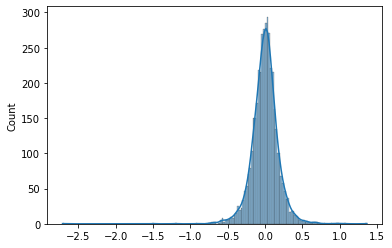

In [202]:
# Plot histogram of residuals
sns.histplot(residual, kde = True)

We can see that the error terms are normally distributed. The assumption of normality is satisfied.

**3. Linearity of Variables**

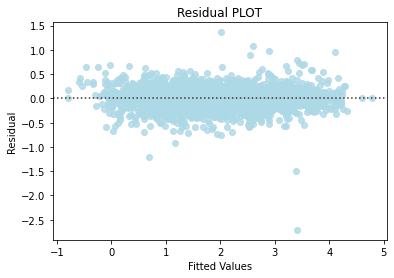

In [211]:
# Predicted values
fitted = ols_res_10.fittedvalues

sns.residplot(x = fitted, y = residual, color = "lightblue")

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")

plt.show()

We can see that there is no pattern in the residuals vs fitted values scatter plot, i.e., the linearity assumption is satisfied.

**4. Test for Homoscedasticity**

In [204]:
from statsmodels.stats.diagnostic import het_white

from statsmodels.compat import lzip

import statsmodels.stats.api as sms

import statsmodels.stats.api as sms

from statsmodels.compat import lzip

name = ["F statistic", "p-value"]

test = sms.het_goldfeldquandt(y_train["price_log"], x_train)

lzip(name, test)

[('F statistic', 0.8285553193379593), ('p-value', 0.9999786893354053)]

-----------------------------
## **Final Test Predictions**
-----------------------------

In [206]:
test_features = pd.get_dummies(X_test, drop_first = True)

test_features = test_features[list(X_train)]

# Applying transform on the test data
test_features = pd.DataFrame(test_features, columns = X_train.columns)

test_features = sm.add_constant(test_features)

test_features = test_features.drop(["Location_Jaipur", "Model_S-Cross", "Model_SL-Class",
                                    "Model_X1", "Model_3", "Model_GLE", "Model_Endeavour", 
                                    "Model_SLK-Class", "Model_Hexa", "Owner_Type_Fourth & Above",
                                    "Model_Elite", "Fuel_Type_LPG", "Fuel_Type_Petrol",
                                    "Fuel_Type_Diesel", "Model_CLS-Class", "Model_Ssangyong",
                                    "Model_GLS", "Model_SLC", "Model_i20", "Model_GL-Class", 
                                    "Model_Beetle", "Model_Captiva", "Model_Clubman", 
                                    "Model_Mustang", "Model_Tiguan", "Model_Versa", "Model_XUV300",
                                    "Seats", "Engine", "Power", "Mileage"], axis = 1)

test_features.head()

,const,Year,kilometers_driven_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Transmission_Manual,Owner_Type_Second,Owner_Type_Third,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_ISUZU,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Lamborghini,Brand_Land,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Model_5,Model_6,Model_7,Model_800,Model_A,Model_A-Star,Model_A3,Model_A4,Model_A6,Model_A7,Model_A8,Model_Accent,Model_Accord,Model_Alto,Model_Amaze,Model_Ameo,Model_Aspire,Model_Aveo,Model_Avventura,Model_B,Model_BR-V,Model_BRV,Model_Baleno,Model_Beat,Model_Bolero,Model_Bolt,Model_Boxster,Model_Brio,Model_CLA,Model_CR-V,Model_Camry,Model_Captur,Model_Cayenne,Model_Cedia,Model_Celerio,Model_Ciaz,Model_City,Model_Civic,Model_Classic,Model_Compass,Model_Continental,Model_Cooper,Model_Corolla,Model_Countryman,Model_Creta,Model_CrossPolo,Model_Cruze,Model_D-MAX,Model_Duster,Model_Dzire,Model_E-Class,Model_EON,Model_EcoSport,Model_Ecosport,Model_Eeco,Model_Elantra,Model_Enjoy,Model_Ertiga,Model_Esteem,Model_Etios,Model_Evalia,Model_F,Model_Fabia,Model_Fiesta,Model_Figo,Model_Fluence,Model_Fortuner,Model_Freestyle,Model_Fusion,Model_GLA,Model_GLC,Model_GO,Model_Gallardo,Model_Getz,Model_Grand,Model_Grande,Model_Ignis,Model_Ikon,Model_Indica,Model_Indigo,Model_Innova,Model_Jazz,Model_Jetta,Model_KUV,Model_KWID,Model_Koleos,Model_Lancer,Model_Laura,Model_Linea,Model_Lodgy,Model_Logan,Model_M-Class,Model_MUX,Model_Manza,Model_Micra,Model_Mobilio,Model_Montero,Model_Nano,Model_New,Model_Nexon,Model_NuvoSport,Model_Octavia,Model_Omni,Model_One,Model_Optra,Model_Outlander,Model_Pajero,Model_Panamera,Model_Passat,Model_Platinum,Model_Polo,Model_Pulse,Model_Punto,Model_Q3,Model_Q5,Model_Q7,Model_Qualis,Model_Quanto,Model_R-Class,Model_RS5,Model_Rapid,Model_Redi,Model_Renault,Model_Ritz,Model_Rover,Model_S,Model_S-Class,Model_S60,Model_S80,Model_SX4,Model_Safari,Model_Sail,Model_Santa,Model_Santro,Model_Scala,Model_Scorpio,Model_Sonata,Model_Spark,Model_Sumo,Model_Sunny,Model_Superb,Model_Swift,Model_TT,Model_TUV,Model_Tavera,Model_Teana,Model_Terrano,Model_Thar,Model_Tiago,Model_Tigor,Model_Tucson,Model_V40,Model_Vento,Model_Venture,Model_Verito,Model_Verna,Model_Vitara,Model_WR-V,Model_WRV,Model_Wagon,Model_X-Trail,Model_X3,Model_X5,Model_X6,Model_XC60,Model_XC90,Model_XE,Model_XF,Model_XJ,Model_XUV500,Model_Xcent,Model_Xenon,Model_Xylo,Model_Yeti,Model_Z4,Model_Zen,Model_Zest,Model_i10,Model_redi-GO
2838,1.0,2016,11.186253,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5309,1.0,2009,11.225243,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3815,1.0,2014,10.778956,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

-----------------------------
## **Predictions on the Test Dataset**
-----------------------------

Once our model is built and validated, we can now use this to predict the sales in our test data as shown below:

In [209]:
# These test predictions will be on a log scale
test_predictions = ols_res_10.predict(test_features)

# We are converting the log scale predictions to its original scale
test_predictions_inverse_transformed = np.exp(test_predictions)

test_predictions_inverse_transformed

2838    39.731395
5309     1.400805
3815     4.648055
975     28.797773
1182     3.139815
          ...    
2764     4.362362
3780     3.772219
2331     4.366863
4158    11.058896
2616     5.887863
Length: 1783, dtype: float64

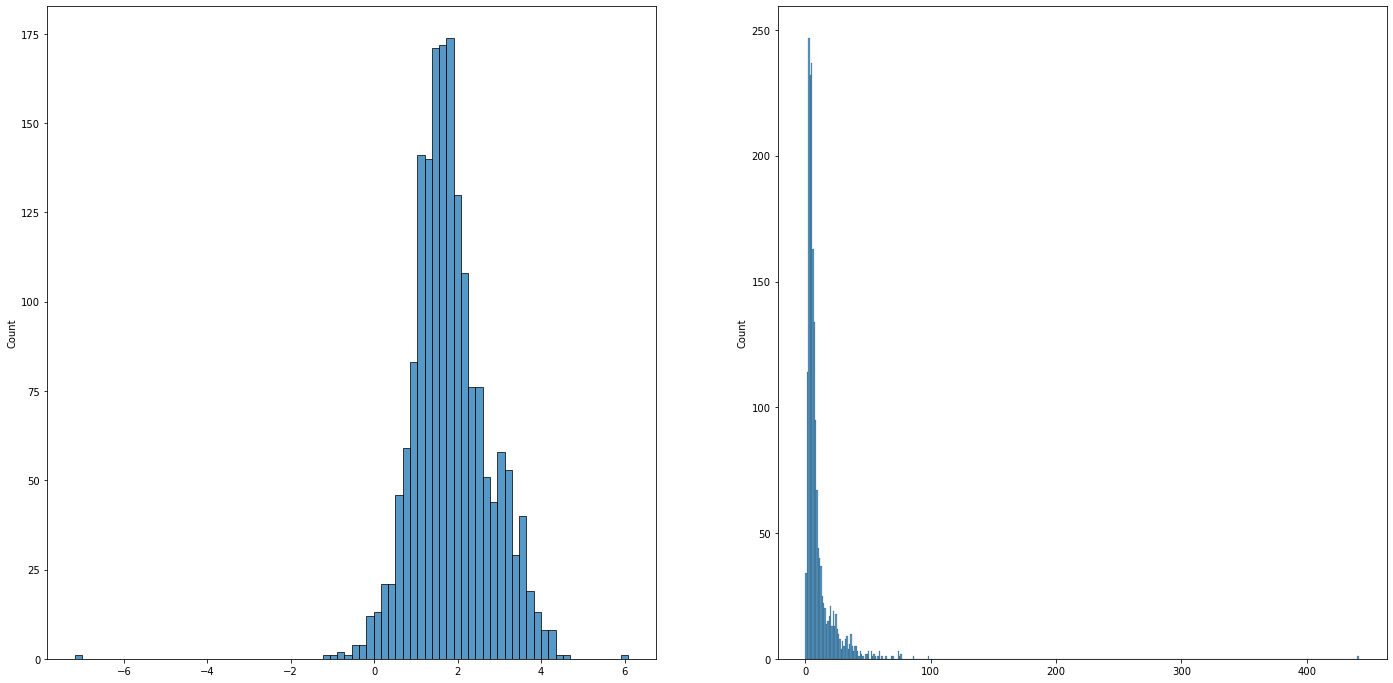

In [210]:
fig, ax = plt.subplots(1, 2, figsize = (24, 12))

sns.histplot(test_predictions, ax = ax[0]);

sns.histplot(test_predictions_inverse_transformed, ax = ax[1]);

## **Conclusions and Recommendations**

- We performed EDA, univariate and bivariate analysis, on all the variables in the dataset.
- We then performed missing values treatment using the relationship between variables.
- We tested various regression techniques and picked the best.
- We started the model building process with all the features.
- We removed multicollinearity from the data and analyzed the model summary report to drop insignificant features.
- Finally, we checked for different assumptions of linear regression and fixed the model iteratively if any assumptions did not hold true.

The model we built has many variables that would work better as a back-end calculation than an equation to be analyzed. It has a spread of locations, brands, and models which affect the price. The biggest take away is expected: the newer and less driven a car is, the higher it will sell for.